In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from lmfit.models import GaussianModel


In [ ]:
# 1) Load your data (custom naming)
dataB165 = np.loadtxt('B_40V_3V_165C.txt', skiprows = 5)

UB_A2_5 = dataB165[:, 1]   # "Acceleration voltage" U_B
UA_A2_5 = dataB165[:, 2]   # "Anode voltage"      U_A

# 2) Uncertainties (2% + small floor)
UBerr = 0.02 * UB_A2_5 + 0.005 * np.ptp(UB_A2_5)
UAerr = 0.02 * UA_A2_5 + 0.005 * np.ptp(UA_A2_5)

# 3) Automatically find peaks in the data
peaks, props = find_peaks(UA_A2_5, height=0.1 * UA_A2_5.max(), distance=20)
peak_centers = UB_A2_5[peaks]
peak_amps    = props["peak_heights"]

# 4) Build a sum‐of‐Gaussians model, one Gaussian per detected peak
model = None
params = None
for i, (cen, amp) in enumerate(zip(peak_centers, peak_amps)):
    prefix = f'g{i}_'
    gauss  = GaussianModel(prefix=prefix)
    if model is None:
        model = gauss
        params = gauss.make_params()
    else:
        model += gauss
        params.update(gauss.make_params())

    # initialize and constrain
    params[prefix + 'center'].set(value=cen,   min=cen-0.5, max=cen+0.5)
    params[prefix + 'amplitude'].set(value=amp, min=0)
    params[prefix + 'sigma'].set(value=0.3,   min=0.05, max=1.0)

# 5) Fit with 1/σ weighting → chi-square minimization
weights = 1.0 / UAerr
result  = model.fit(UA_A2_5, params, x=UB_A2_5, weights=weights)

# 6) Plot data + fit
plt.figure(figsize=(10,6))
plt.errorbar(UB_A2_5, UA_A2_5,
             xerr=UBerr, yerr=UAerr,
             fmt='+', ms=0.1, ecolor='black', alpha=1,
             label=r'$T=165\,^\circ\mathrm{C}$')
plt.plot(UB_A2_5, result.best_fit,
         'r--', lw=1, label='Anpassung an Messwerte')
plt.xlabel('Beschleunigungsspannung $U_B$ [V]', fontsize=14)
plt.ylabel('Anodenspannung $U_A$ [V]',        fontsize=14)
#plt.title('Franck–Hertz: Multi‐Gaussian Fit', fontsize=16)
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig(f"T165.png", dpi=1000)
plt.show()

# 7) Extract and report σ's
sigmas = [v for k,v in result.best_values.items() if k.endswith('sigma')]
mean_s, std_s = np.mean(sigmas), np.std(sigmas)
print("Individual σ values:")
for i, s in enumerate(sigmas, 1):
    print(f"  σ_{i:02d} = {s:.3f} V")
print(f"\nMean σ = {mean_s:.3f} V")
print(f"Std. dev. of σ = {std_s:.3f} V")

# 8) Compute successive peak–to–peak spacings ΔU_B, drop any zero‐valued spacing
Delta_U_B_A2_5 = np.diff(peak_centers)
Delta_U_B_A2_5 = Delta_U_B_A2_5[Delta_U_B_A2_5 != 0]  # ignore zero spacings

print("\nPeak spacings ΔU_B_A2_5 between successive centers:")
for i, d in enumerate(Delta_U_B_A2_5, 1):
    print(f"  ΔU_{i:02d} = {d:.3f} V")

# 9) Mean and std deviation of spacing
mean_Delta_U = np.mean(Delta_U_B_A2_5)
std_Delta_U  = np.std(Delta_U_B_A2_5)
print(f"\nMean ΔU_B_A2_5 = {mean_Delta_U:.3f} V")
print(f"Std. dev. ΔU_B_A2_5 = {std_Delta_U:.3f} V")

# 10) Convert to energy
e_charge = 1.602176634e-19  # C
Delta_E_A2_5_J   = e_charge * mean_Delta_U
Std_Delta_E_A2_5_J = e_charge * std_Delta_U
Delta_E_A2_5_eV  = mean_Delta_U        # 1 V × e = 1 eV
Std_Delta_E_A2_5_eV = std_Delta_U

print(f"\nΔE_A2_5 = {Delta_E_A2_5_J:.3e} J = {Delta_E_A2_5_eV:.3f} eV")
print(f"Std. dev. ΔE_A2_5 = {Std_Delta_E_A2_5_J:.3e} J = {Std_Delta_E_A2_5_eV:.3f} eV")

print("THIS IS FOR T165")


In [ ]:
# 1) Load your data (custom naming)
dataB170 = np.loadtxt('B_40V_3V_170C.txt', skiprows = 5)

UB_A2_5 = dataB170[:, 1]   # "Acceleration voltage" U_B
UA_A2_5 = dataB170[:, 2]   # "Anode voltage"      U_A

# 2) Uncertainties (2% + small floor)
UBerr = 0.02 * UB_A2_5 + 0.005 * np.ptp(UB_A2_5)
UAerr = 0.02 * UA_A2_5 + 0.005 * np.ptp(UA_A2_5)

# 3) Automatically find peaks in the data
peaks, props = find_peaks(UA_A2_5, height=0.1 * UA_A2_5.max(), distance=20)
peak_centers = UB_A2_5[peaks]
peak_amps    = props["peak_heights"]

# 4) Build a sum‐of‐Gaussians model, one Gaussian per detected peak
model = None
params = None
for i, (cen, amp) in enumerate(zip(peak_centers, peak_amps)):
    prefix = f'g{i}_'
    gauss  = GaussianModel(prefix=prefix)
    if model is None:
        model = gauss
        params = gauss.make_params()
    else:
        model += gauss
        params.update(gauss.make_params())

    # initialize and constrain
    params[prefix + 'center'].set(value=cen,   min=cen-0.5, max=cen+0.5)
    params[prefix + 'amplitude'].set(value=amp, min=0)
    params[prefix + 'sigma'].set(value=0.3,   min=0.05, max=1.0)

# 5) Fit with 1/σ weighting → chi-square minimization
weights = 1.0 / UAerr
result  = model.fit(UA_A2_5, params, x=UB_A2_5, weights=weights)

# 6) Plot data + fit
plt.figure(figsize=(10,6))
plt.errorbar(UB_A2_5, UA_A2_5,
             xerr=UBerr, yerr=UAerr,
             fmt='+', ms=0.1, ecolor='blue', alpha=1,
             label=r'$T=170\,^\circ\mathrm{C}$')
plt.plot(UB_A2_5, result.best_fit,
         'r--', lw=1, label='Anpassung an Messwerte')
plt.xlabel('Beschleunigungsspannung $U_B$ [V]', fontsize=14)
plt.ylabel('Anodenspannung $U_A$ [V]',        fontsize=14)
#plt.title('Franck–Hertz: Multi‐Gaussian Fit', fontsize=16)
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig(f"T170.png", dpi=1000)
plt.show()

# 7) Extract and report σ's
sigmas = [v for k,v in result.best_values.items() if k.endswith('sigma')]
mean_s, std_s = np.mean(sigmas), np.std(sigmas)
print("Individual σ values:")
for i, s in enumerate(sigmas, 1):
    print(f"  σ_{i:02d} = {s:.3f} V")
print(f"\nMean σ = {mean_s:.3f} V")
print(f"Std. dev. of σ = {std_s:.3f} V")

# 8) Compute successive peak–to–peak spacings ΔU_B, drop any zero‐valued spacing
Delta_U_B_A2_5 = np.diff(peak_centers)
Delta_U_B_A2_5 = Delta_U_B_A2_5[Delta_U_B_A2_5 != 0]  # ignore zero spacings

print("\nPeak spacings ΔU_B_A2_5 between successive centers:")
for i, d in enumerate(Delta_U_B_A2_5, 1):
    print(f"  ΔU_{i:02d} = {d:.3f} V")

# 9) Mean and std deviation of spacing
mean_Delta_U = np.mean(Delta_U_B_A2_5)
std_Delta_U  = np.std(Delta_U_B_A2_5)
print(f"\nMean ΔU_B_A2_5 = {mean_Delta_U:.3f} V")
print(f"Std. dev. ΔU_B_A2_5 = {std_Delta_U:.3f} V")

# 10) Convert to energy
e_charge = 1.602176634e-19  # C
Delta_E_A2_5_J   = e_charge * mean_Delta_U
Std_Delta_E_A2_5_J = e_charge * std_Delta_U
Delta_E_A2_5_eV  = mean_Delta_U        # 1 V × e = 1 eV
Std_Delta_E_A2_5_eV = std_Delta_U

print(f"\nΔE_A2_5 = {Delta_E_A2_5_J:.3e} J = {Delta_E_A2_5_eV:.3f} eV")
print(f"Std. dev. ΔE_A2_5 = {Std_Delta_E_A2_5_J:.3e} J = {Std_Delta_E_A2_5_eV:.3f} eV")

print("THIS IS FOR T170")


In [ ]:
# 1) Load your data (custom naming)
dataB170 = np.loadtxt('B_40V_3V_175C.txt', skiprows = 5)


UB_A2_5 = dataB170[:, 1]   # "Acceleration voltage" U_B
UA_A2_5 = dataB170[:, 2]   # "Anode voltage"      U_A

# 2) Uncertainties (2% + small floor)
UBerr = 0.02 * UB_A2_5 + 0.005 * np.ptp(UB_A2_5)
UAerr = 0.02 * UA_A2_5 + 0.005 * np.ptp(UA_A2_5)

# 3) Automatically find peaks in the data
peaks, props = find_peaks(UA_A2_5, height=0.1 * UA_A2_5.max(), distance=20)
peak_centers = UB_A2_5[peaks]
peak_amps    = props["peak_heights"]

# 4) Build a sum‐of‐Gaussians model, one Gaussian per detected peak
model = None
params = None
for i, (cen, amp) in enumerate(zip(peak_centers, peak_amps)):
    prefix = f'g{i}_'
    gauss  = GaussianModel(prefix=prefix)
    if model is None:
        model = gauss
        params = gauss.make_params()
    else:
        model += gauss
        params.update(gauss.make_params())

    # initialize and constrain
    params[prefix + 'center'].set(value=cen,   min=cen-0.5, max=cen+0.5)
    params[prefix + 'amplitude'].set(value=amp, min=0)
    params[prefix + 'sigma'].set(value=0.3,   min=0.05, max=1.0)

# 5) Fit with 1/σ weighting → chi-square minimization
weights = 1.0 / UAerr
result  = model.fit(UA_A2_5, params, x=UB_A2_5, weights=weights)

# 6) Plot data + fit
plt.figure(figsize=(10,6))
plt.errorbar(UB_A2_5, UA_A2_5,
             xerr=UBerr, yerr=UAerr,
             fmt='+', ms=0.1, ecolor='red', alpha=1,
             label=r'$T=175\,^\circ\mathrm{C}$')
plt.plot(UB_A2_5, result.best_fit,
         'r--', lw=1, label='Anpassung an Messwerte')
plt.xlabel('Beschleunigungsspannung $U_B$ [V]', fontsize=14)
plt.ylabel('Anodenspannung $U_A$ [V]',        fontsize=14)
#plt.title('Franck–Hertz: Multi‐Gaussian Fit', fontsize=16)
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig(f"T175.png", dpi=1000)
plt.show()

# 7) Extract and report σ's
sigmas = [v for k,v in result.best_values.items() if k.endswith('sigma')]
mean_s, std_s = np.mean(sigmas), np.std(sigmas)
print("Individual σ values:")
for i, s in enumerate(sigmas, 1):
    print(f"  σ_{i:02d} = {s:.3f} V")
print(f"\nMean σ = {mean_s:.3f} V")
print(f"Std. dev. of σ = {std_s:.3f} V")

# 8) Compute successive peak–to–peak spacings ΔU_B, drop any zero‐valued spacing
Delta_U_B_A2_5 = np.diff(peak_centers)
Delta_U_B_A2_5 = Delta_U_B_A2_5[Delta_U_B_A2_5 != 0]  # ignore zero spacings

print("\nPeak spacings ΔU_B_A2_5 between successive centers:")
for i, d in enumerate(Delta_U_B_A2_5, 1):
    print(f"  ΔU_{i:02d} = {d:.3f} V")

# 9) Mean and std deviation of spacing
mean_Delta_U = np.mean(Delta_U_B_A2_5)
std_Delta_U  = np.std(Delta_U_B_A2_5)
print(f"\nMean ΔU_B_A2_5 = {mean_Delta_U:.3f} V")
print(f"Std. dev. ΔU_B_A2_5 = {std_Delta_U:.3f} V")

# 10) Convert to energy
e_charge = 1.602176634e-19  # C
Delta_E_A2_5_J   = e_charge * mean_Delta_U
Std_Delta_E_A2_5_J = e_charge * std_Delta_U
Delta_E_A2_5_eV  = mean_Delta_U        # 1 V × e = 1 eV
Std_Delta_E_A2_5_eV = std_Delta_U

print(f"\nΔE_A2_5 = {Delta_E_A2_5_J:.3e} J = {Delta_E_A2_5_eV:.3f} eV")
print(f"Std. dev. ΔE_A2_5 = {Std_Delta_E_A2_5_J:.3e} J = {Std_Delta_E_A2_5_eV:.3f} eV")

print("THIS IS FOR T175")


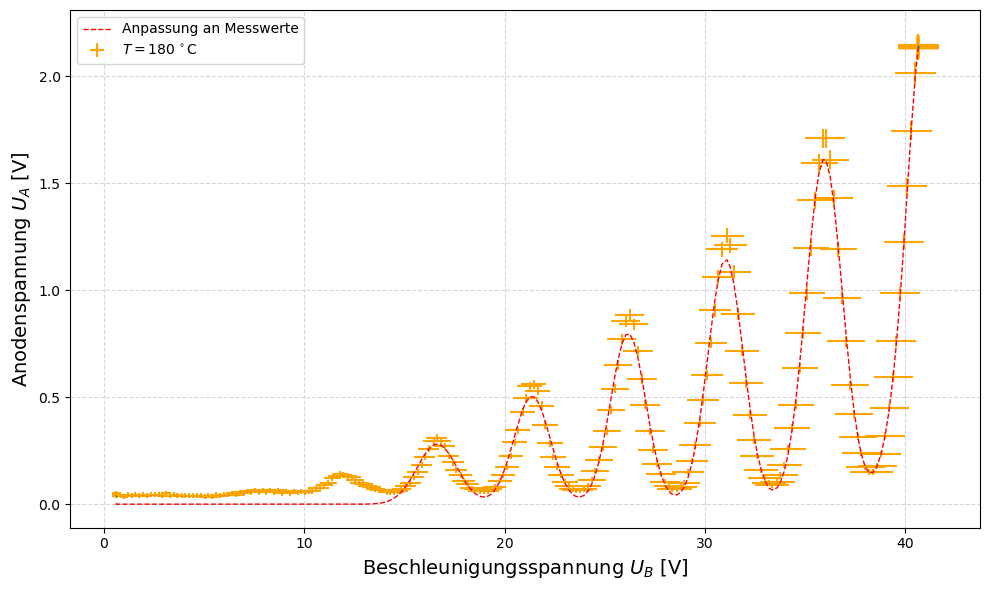

Individual σ values:
  σ_01 = 0.736 V
  σ_02 = 0.980 V
  σ_03 = 0.914 V
  σ_04 = 0.888 V
  σ_05 = 0.874 V
  σ_06 = 0.906 V
  σ_07 = 1.000 V

Mean σ = 0.900 V
Std. dev. of σ = 0.080 V

Peak spacings ΔU_B_A2_5 between successive centers:
  ΔU_01 = 4.850 V
  ΔU_02 = 4.800 V
  ΔU_03 = 4.850 V
  ΔU_04 = 4.800 V
  ΔU_05 = 4.750 V

Mean ΔU_B_A2_5 = 4.810 V
Std. dev. ΔU_B_A2_5 = 0.037 V

ΔE_A2_5 = 7.706e-19 J = 4.810 eV
Std. dev. ΔE_A2_5 = 5.995e-21 J = 0.037 eV
THIS IS FOR T175


In [15]:
# 1) Load your data (custom naming)
dataB170 = np.loadtxt('B_40V_3V_180C.txt', skiprows = 5)


UB_A2_5 = dataB170[:, 1]   # "Acceleration voltage" U_B
UA_A2_5 = dataB170[:, 2]   # "Anode voltage"      U_A

# 2) Uncertainties (2% + small floor)
UBerr = 0.02 * UB_A2_5 + 0.005 * np.ptp(UB_A2_5)
UAerr = 0.02 * UA_A2_5 + 0.005 * np.ptp(UA_A2_5)

# 3) Automatically find peaks in the data
peaks, props = find_peaks(UA_A2_5, height=0.1 * UA_A2_5.max(), distance=20)
peak_centers = UB_A2_5[peaks]
peak_amps    = props["peak_heights"]

# 4) Build a sum‐of‐Gaussians model, one Gaussian per detected peak
model = None
params = None
for i, (cen, amp) in enumerate(zip(peak_centers, peak_amps)):
    prefix = f'g{i}_'
    gauss  = GaussianModel(prefix=prefix)
    if model is None:
        model = gauss
        params = gauss.make_params()
    else:
        model += gauss
        params.update(gauss.make_params())

    # initialize and constrain
    params[prefix + 'center'].set(value=cen,   min=cen-0.5, max=cen+0.5)
    params[prefix + 'amplitude'].set(value=amp, min=0)
    params[prefix + 'sigma'].set(value=0.3,   min=0.05, max=1.0)

# 5) Fit with 1/σ weighting → chi-square minimization
weights = 1.0 / UAerr
result  = model.fit(UA_A2_5, params, x=UB_A2_5, weights=weights)

# 6) Plot data + fit
plt.figure(figsize=(10,6))
plt.errorbar(UB_A2_5, UA_A2_5,
             xerr=UBerr, yerr=UAerr,
             fmt='+', ms=0.1, ecolor='orange', alpha=1,
             label=r'$T=180\,^\circ\mathrm{C}$')
plt.plot(UB_A2_5, result.best_fit,
         'r--', lw=1, label='Anpassung an Messwerte')
plt.xlabel('Beschleunigungsspannung $U_B$ [V]', fontsize=14)
plt.ylabel('Anodenspannung $U_A$ [V]',        fontsize=14)
#plt.title('Franck–Hertz: Multi‐Gaussian Fit', fontsize=16)
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig(f"T180.png", dpi=1000)
plt.show()

# 7) Extract and report σ's
sigmas = [v for k,v in result.best_values.items() if k.endswith('sigma')]
mean_s, std_s = np.mean(sigmas), np.std(sigmas)
print("Individual σ values:")
for i, s in enumerate(sigmas, 1):
    print(f"  σ_{i:02d} = {s:.3f} V")
print(f"\nMean σ = {mean_s:.3f} V")
print(f"Std. dev. of σ = {std_s:.3f} V")

# 8) Compute successive peak–to–peak spacings ΔU_B, drop any zero‐valued spacing
Delta_U_B_A2_5 = np.diff(peak_centers)
Delta_U_B_A2_5 = Delta_U_B_A2_5[Delta_U_B_A2_5 != 0]  # ignore zero spacings

print("\nPeak spacings ΔU_B_A2_5 between successive centers:")
for i, d in enumerate(Delta_U_B_A2_5, 1):
    print(f"  ΔU_{i:02d} = {d:.3f} V")

# 9) Mean and std deviation of spacing
mean_Delta_U = np.mean(Delta_U_B_A2_5)
std_Delta_U  = np.std(Delta_U_B_A2_5)
print(f"\nMean ΔU_B_A2_5 = {mean_Delta_U:.3f} V")
print(f"Std. dev. ΔU_B_A2_5 = {std_Delta_U:.3f} V")

# 10) Convert to energy
e_charge = 1.602176634e-19  # C
Delta_E_A2_5_J   = e_charge * mean_Delta_U
Std_Delta_E_A2_5_J = e_charge * std_Delta_U
Delta_E_A2_5_eV  = mean_Delta_U        # 1 V × e = 1 eV
Std_Delta_E_A2_5_eV = std_Delta_U

print(f"\nΔE_A2_5 = {Delta_E_A2_5_J:.3e} J = {Delta_E_A2_5_eV:.3f} eV")
print(f"Std. dev. ΔE_A2_5 = {Std_Delta_E_A2_5_J:.3e} J = {Std_Delta_E_A2_5_eV:.3f} eV")

print("THIS IS FOR T175")
